In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import graphviz as gr
import matplotlib.pyplot as plt

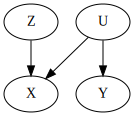

In [5]:
g = gr.Digraph()
g.edge("Z", "X")
g.edge("U", "X")
g.edge("U", "Y")

g

- 위에서 node는 Random variable이고 edge는 causality의 관계를 의미한다
- 위 그래프는 Z가 X에 영향을 주고, U가 X,Y에 영향을 주는 것을 나타내는 causal graphical graph

# Confounding Bias

- treatment와 outcome이 동일한 cause를 갖는 경우

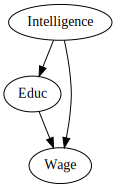

In [8]:
g = gr.Digraph()
g.edge("Intelligence", "Educ"),
g.edge("Intelligence", "Wage"),
g.edge("Educ", "Wage")
g

- 위의 그림에서 confounder는 intelligence이다.
- confounder를 알면 우리가 control할 수 있으므로 confouder bias를 없앨 수 있고 treatement가 outcome에 미치는 정도를 파악할 수 있다.
- 하지만 항상 가능한 것은 아니다.
  - confounder를 알고 있어도 이를 측정할 수 없거나
  - 모르는 경우 존재 (unmeasured variable)

# Selection Bias

- confouding bias는 common cause를 control하지 않았을 때, 발생하는 것이라고 한다면 selection bias는 그 반대로 control하지 말아야할 것을 control하는 경우 발생하다.
- 대표적인 경우가 collider를 control할 때 이다.

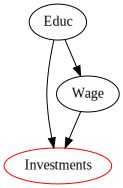

In [13]:
g = gr.Digraph()

g.edge("Educ", "Investments")
g.edge("Educ", "Wage")
g.edge("Wage", "Investments")
g.node("Investments", "Investments", color='red')

g

- 위의 그림에서 만약에 Investments를 control 한다면 treatment와 outcome간의 direct path이외의 path가 열리고 bias가 발생할 수 있다.
- Investments는 1이라고 control하면 교육을 받지 않았음에도 교육을 받은 그룹처럼 Investments를 할 수 있는 것은 그만큼 wage가 더 높아서 일 수도 있다.

$$E[Y_0|T=0, I=1] > E[Y_0|T=1, I=1]$$


- 또다른 selection bias가 발생하는 경우는 mediator에 대해 control했을 때 이다. 

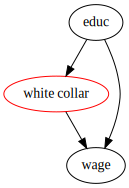

In [14]:
g = gr.Digraph()

g.edge("educ", "white collar")
g.edge("educ", "wage")
g.edge("white collar", "wage")
g.node("white collar", "white collar", color="red")

g

- white collar = 1 이라고 control했을 경우, 아래의 식처럼 education을 받지 않은 그룹이 그만큼 hard worker들이라서 $Y_0$의 값이 더 높을 수 있다.

$$E[Y_0|T=0, WC=1] > E[Y_0|T=1, WC=1]$$